# Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data collection and Processing

In [ ]:
# Loading the data from CSV file to pandas Dataframe
car_data=pd.read_csv("CarPrice_Assignment.csv")

In [ ]:
# Inspecting the first ive rows of the Dataframe
car_data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Checking the number of rows and columns
car_data.shape

(205, 26)

In [ ]:
# Checking the number of missing values
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
# Getting some information about the dataset
car_data.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [ ]:
# Extracting the columns
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Checking the distribution of Categorical data

In [ ]:
print(car_data.fueltype.value_counts())
print(car_data.carbody.value_counts())
print(car_data.cylindernumber.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


# Encoding the Categorical data

In [ ]:
car_data.replace({"fueltype":{"gas":0,"diesel":1}},inplace=True)
car_data.replace({"carbody":{"sedan":0,"hatchback":1,"wagon":2,"hardtop":3,"convertible":4}},inplace=True)
car_data.replace({"doornumber":{"two":0,"four":1}},inplace=True)
car_data.replace({"cylindernumber":{"four":0,"six":1,"five":2,"eight":3,"two":4,"three":5,"twelve":6}},inplace=True)

In [ ]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,std,0,4,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,std,0,4,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,std,0,1,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,std,1,0,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,std,1,0,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Splitting the data and Taget

In [ ]:
X=car_data.drop(["CarName","aspiration","drivewheel","enginelocation","fuelsystem","price","enginetype"],axis=1)
Y=car_data["price"]

In [ ]:
X

,car_ID,symboling,fueltype,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,0,0,4,88.6,168.8,64.1,48.8,2548,0,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,0,0,4,88.6,168.8,64.1,48.8,2548,0,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,0,0,1,94.5,171.2,65.5,52.4,2823,1,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,0,1,0,99.8,176.6,66.2,54.3,2337,0,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,0,1,0,99.4,176.6,66.4,54.3,2824,2,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,1,0,109.1,188.8,68.9,55.5,2952,0,141,3.78,3.15,9.5,114,5400,23,28
201,202,-1,0,1,0,109.1,188.8,68.8,55.5,3049,0,141,3.78,3.15,8.7,160,5300,19,25
202,203,-1,0,1,0,109.1,188.8,68.9,55.5,3012,1,173,3.58,2.87,8.8,134,5500,18,23
203,204,-1,1,1,0,109.1,188.8,68.9,55.5,3217,1,145,3.01,3.40,23.0,106,4800,26,27


In [ ]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

# Splitting Training data and Test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

# Model Training ( Linear Regression)

In [ ]:
# Loading the Linear Regression model
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [ ]:
# Prediction on Training data
training_data_prediction=lin_reg.predict(X_train)

In [ ]:
# R squared Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error for training data : ",error_score)

R squared error for training data :  0.8724092127919401


# Visualize the Actual Prices and Predicted prices

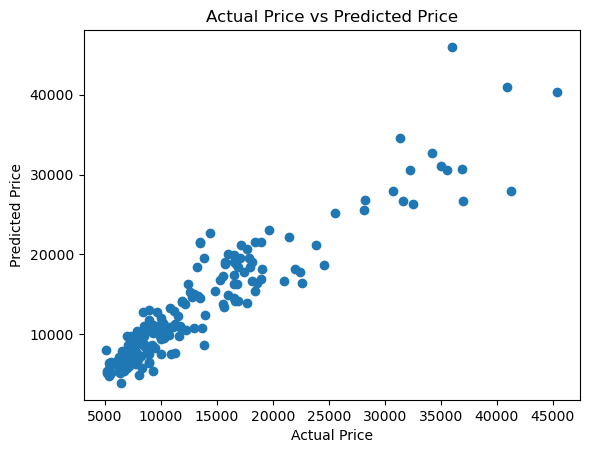

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
# Prediction on Test data
test_data_prediction=lin_reg.predict(X_test)

In [ ]:
#R squared Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error for test data : ",error_score)

R squared error for test data :  0.8378142169328674


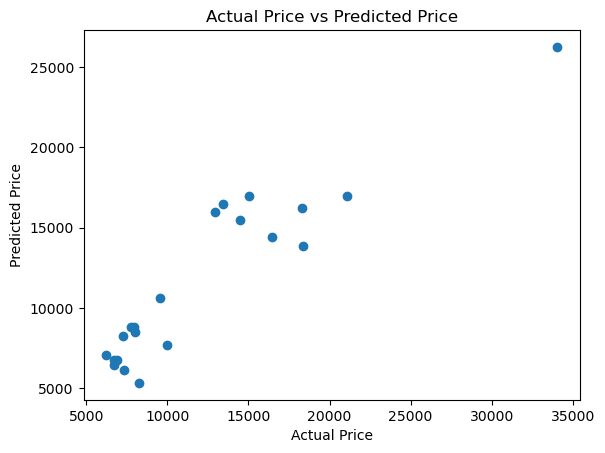

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()